In [2]:
degree_node <- read.csv(file="../../log/degree_distr.csv", skip=12, header=TRUE, sep=",") ## read file

In [3]:
print(degree_node) ## print

    node degree
1      6      9
2      7     12
3      8      2
4      9      2
5     10     27
6     11     13
7     12      5
8     13     16
9     14      9
10    15      3
11    16     18
12    17      2
13    18      3
14    19      8
15    20     15
16    21     18
17    22      5
18    23      1
19    24      2
20    25      5
21    26      5
22    27      2
23    28      8
24    29      8
25    30      2
26    31     13
27    32      2
28    33      5
29    34     23
30    35      3
31    36     18
32    37      4
33    38      4
34    39      4
35    40     16
36    41      4
37    42      4
38    43     16
39    44     23
40    45     23
41    46     10
42    47      9
43    48      3
44    49      5
45    50      1
46    51      3
47    52     13
48    53      3
49    54      5
50    55      6
51    56     12
52    57      2
53    58      3
54    59      6
55    60     22
56    61      6
57    62      2
58    63     13
59    64      4
60    65     13
61    66      4
62    67

In [102]:
degrees <- degree_node[,c("degree")]

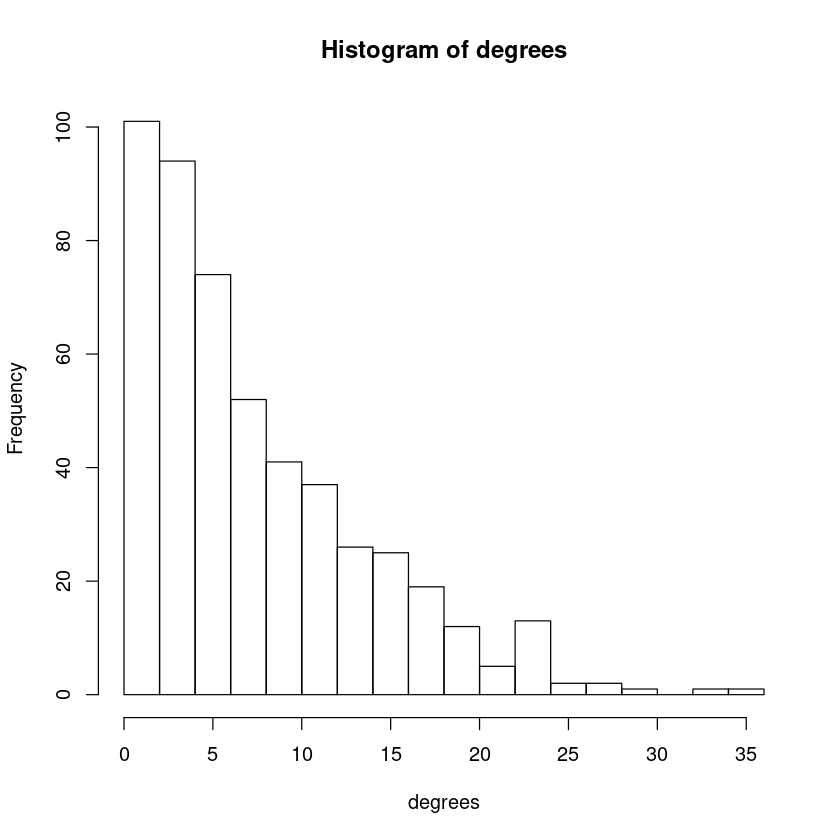

In [103]:
hist(degrees, breaks=20)

node,degree
6.01,9.01
7.01,12.01
8.01,2.01
9.01,2.01
10.01,27.01
11.01,13.01
12.01,5.01
13.01,16.01
14.01,9.01
15.01,3.01


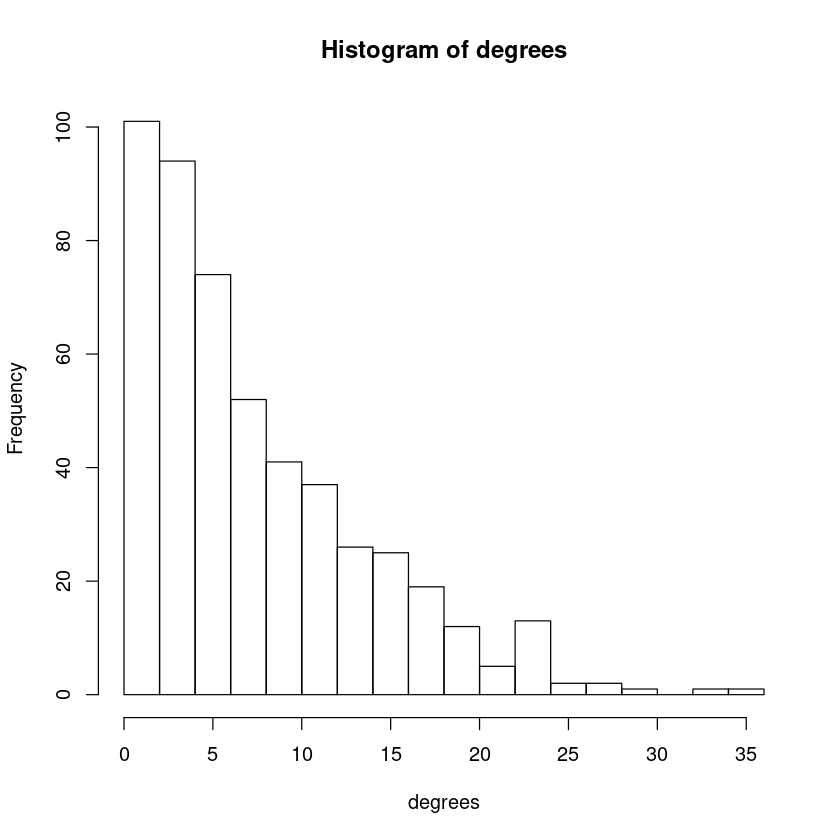

In [141]:
eps <- 0.01
X <- 1:(length(hist(degrees, breaks=20)$breaks) - 1)
Y <- hist(degrees, breaks=20)$counts + eps
DATANOLOG <- degree_node + eps
DATANOLOG

In [118]:
X <- log(X)
Y <- log(Y + eps)
DATA = data.frame(X,Y)
DATA <- DATA[1:16,]
DATA

X,Y
0.0000000,4.61531852
0.6931472,4.54350753
1.0986123,4.30433533
1.3862944,3.95162826
1.6094379,3.71405975
1.7917595,3.61145831
1.9459101,3.25886547
2.0794415,3.21967551
2.1972246,2.94549106
2.3025851,2.48657193


In [119]:
linearMod <- lm(Y ~ X, data=DATA)  # build linear regression model on full data
print(linearMod)
print(summary(linearMod))
summary(linearMod)$coefficients


Call:
lm(formula = Y ~ X, data = DATA)

Coefficients:
(Intercept)            X  
      6.369       -2.072  


Call:
lm(formula = Y ~ X, data = DATA)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5358 -0.3604  0.3344  0.9305  1.3466 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.3685     1.0248   6.214 2.26e-05 ***
X            -2.0720     0.4966  -4.172  0.00094 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.518 on 14 degrees of freedom
Multiple R-squared:  0.5543,	Adjusted R-squared:  0.5224 
F-statistic: 17.41 on 1 and 14 DF,  p-value: 0.0009399



,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),6.368506,1.0248283,6.214217,2.259172e-05
X,-2.071974,0.4966064,-4.172265,9.399113e-04


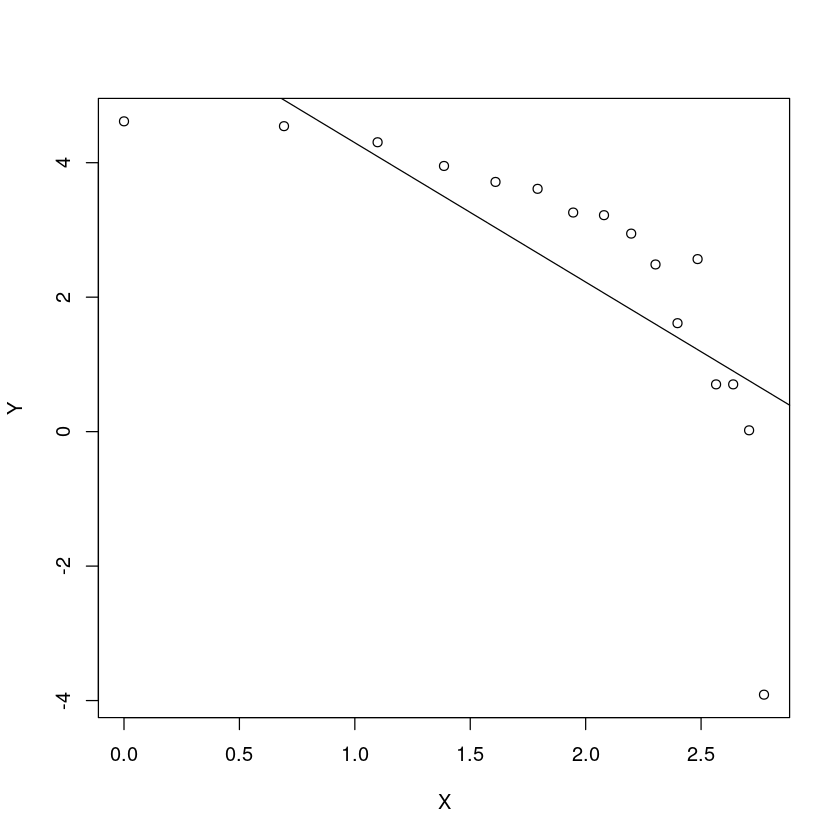

In [120]:
plot(DATA)
abline(linearMod)

In [121]:
library("poweRlaw")

In [147]:
#Continuous power law objects take vectors as inputs,
m_bl = conpl$new(DATANOLOG$degree)
#estimate the lower-bound
est = estimate_xmin(m_bl)
#update the distribution object
m_bl$setXmin(est)


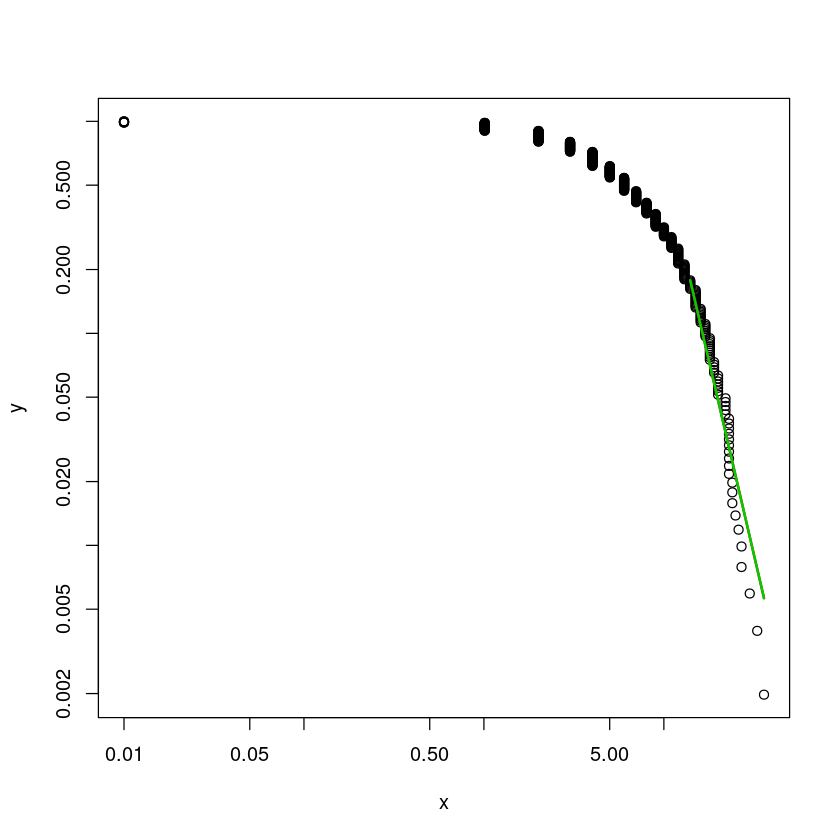

In [148]:
plot(m_bl)
lines(m_bl, col=2, lwd=2)
lines(m_bl, col=3, lwd=2)

In [150]:
m_bl$pars

[1] 4.656313